In [5]:
import sys
import os

sys.path.append(os.path.abspath("../../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel

sys.path.append(os.path.abspath("../../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
# from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../basis"))
from basis.bspline import BSplineBasis
from basis.polynomial import PolynomialBasis
from basis.basis import plot_design
from basis.basis import Basis
from basis.fourier import FourierBasis

In [6]:
def create_experimental_dictionary(ID, model, optimizer, best_design, best_objective):
    COLUMNS = ['ID', 'md_type', 'md_family_x', 'md_family_b', 'md_params_x', 'md_params_b', 'md_params_y', 'md_runs',
               'md_optimality_type',
               'alg_type', 'alg_epochs', 'alg_refinement_epochs', 'alg_levels',
               'alg_latent_dim', 'alg_base', 'alg_max_layers', 'alg_alpha', 'alg_latent_space_activation',
               'alg_output_layer_activation',
               'alg_training_set_size', 'alg_batch_size', 'alg_patience', 'alg_n_calls', 'alg_acq_fun',
               'alg_n_random_starts',
               'alg_execution_time',
               'out_design', 'out_opt_value', 'DATE']
    entry = {key: 'NULL' for key in COLUMNS}
    entry['ID'] = ID
    entry['md_type'] = getattr(model, 'type', 'NULL')
    entry['md_family_x'] = getattr(model, 'family_x', 'NULL')
    entry['md_family_b'] = getattr(model, 'family_b', 'NULL')
    entry['md_params_x'] = getattr(model, 'params_x', 'NULL')
    entry['md_params_b'] = getattr(model, 'params_b', 'NULL')
    entry['md_params_y'] = getattr(model, 'params_y', 'NULL')
    entry['md_runs'] = getattr(model, 'runs', 'NULL')
    entry['md_optimality_type'] = getattr(model, 'optimality_type', 'NULL')
    entry['alg_type'] = getattr(optimizer, 'type', 'NULL')
    entry['alg_epochs'] = getattr(optimizer, 'epochs', 'NULL')
    entry['alg_refinement_epochs'] = getattr(optimizer, 'refinement_epochs', 'NULL')
    entry['alg_levels'] = getattr(optimizer, 'levels', 'NULL')
    entry['alg_latent_dim'] = getattr(optimizer, 'latent_dim', 'NULL')
    entry['alg_base'] = getattr(optimizer, 'base', 'NULL')
    entry['alg_max_layers'] = getattr(optimizer, 'max_layers', 'NULL')
    entry['alg_alpha'] = getattr(optimizer, 'alpha', 'NULL')
    entry['alg_latent_space_activation'] = getattr(optimizer, 'latent_space_activation', 'NULL')
    entry['alg_output_layer_activation'] = getattr(optimizer, 'output_layer_activation', 'NULL')
    entry['alg_training_set_size'] = getattr(optimizer, 'training_set_size', 'NULL')
    entry['alg_batch_size'] = getattr(optimizer, 'batch_size', 'NULL')
    entry['alg_patience'] = getattr(optimizer, 'patience', 'NULL')
    entry['alg_n_calls'] = getattr(optimizer, 'n_calls', 'NULL')
    entry['alg_acq_fun'] = getattr(optimizer, 'acq_fun', 'NULL')
    entry['alg_n_random_starts'] = getattr(optimizer, 'n_random_starts', 'NULL')
    entry['alg_execution_time'] = getattr(optimizer, 'execution_time', 'NULL')
    entry['out_design'] = best_design if best_design else 'NULL'
    entry['out_opt_value'] = best_objective if best_objective else 'NULL'
    return entry

### Settings

In [7]:
N = 6 # runs
epochs = 100
refinement_epochs = 10
x_base_1 = BSplineBasis(degree=3, num_basis_functions=10)
b_base_1 = PolynomialBasis(degree=2)
x_base_2 = BSplineBasis(degree=1, num_basis_functions=10)
b_base_2 = PolynomialBasis(degree=2)
bases_pairs = [(x_base_1, b_base_1)]
x_bases = [x_base_1]

s_on_f_model = ScalarOnFunctionModel(bases_pairs=bases_pairs)

### Continuous

In [8]:
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs, refinement_epochs=refinement_epochs)

100%|██████████| 10/10 [00:00<00:00, 113.99it/s]


In [9]:
experimental_dictionary = create_experimental_dictionary(
    ID=1,
    model=s_on_f_model,
    optimizer=optimizer_s_on_f,
    best_design=best_design_s_on_f,
    best_objective=best_objective_value_s_on_f
)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
experimental_dictionary

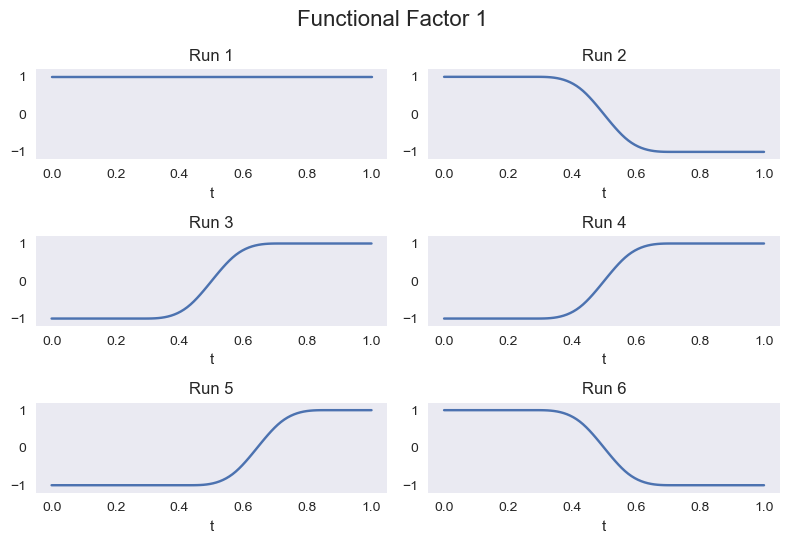

In [5]:
plot_design(best_design_s_on_f, x_bases, N,
            sub_x=3, sub_y=2)